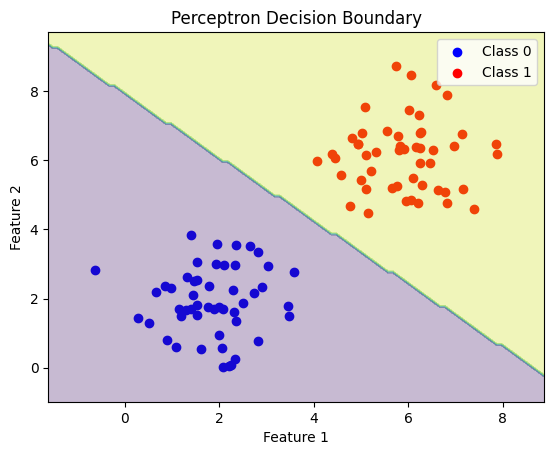

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for two classes
np.random.seed(42)

# Class 0 points
class0_points = np.random.normal(loc=[2, 2], scale=1, size=(50, 2))
class0_labels = np.zeros(50)

# Class 1 points
class1_points = np.random.normal(loc=[6, 6], scale=1, size=(50, 2))
class1_labels = np.ones(50)

# Combine data
X = np.vstack((class0_points, class1_points))
y = np.concatenate((class0_labels, class1_labels))

# Shuffle data
shuffle_indices = np.arange(X.shape[0])
np.random.shuffle(shuffle_indices)
X = X[shuffle_indices]
y = y[shuffle_indices]

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def activation(self, x):
        return 1 if x >= 0 else 0
    
    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                prediction = self.activation(np.dot(X[i], self.weights) + self.bias)
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
    
    def predict(self, x):
        return self.activation(np.dot(x, self.weights) + self.bias)

# Create and train the perceptron
input_size = X.shape[1]
perceptron = Perceptron(input_size)
perceptron.train(X, y)

# Plot the data and decision boundary
plt.scatter(class0_points[:, 0], class0_points[:, 1], color='blue', label='Class 0')
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='red', label='Class 1')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.array([perceptron.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.show()
